# Capstone Report 1

## Task:

 Our job is to visualize the passenger information and scores, find correlations between the ratings and overall satisfaction of the passenger and lastly analyze the results and where there is need for improvement from the airline.

## Table of contents:

 ## 1. Data Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.style.use('bmh')

In [2]:
df_airline=pd.read_csv(r"C:\Users\bagya\Downloads\Airline.csv")

## Glance at the dataset:

In [3]:
df_airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print("Number of rows: ",df_airline.shape[0])
print("Number of columns: ",df_airline.shape[1])

Number of rows:  103904
Number of columns:  25


### Data Dictionary:


1.Gender : Gender of the passengers(Female, Male) 

2.Customer Type: The customer type (Loyal customer, disloyal customer)

3.Age: The actual age of the passengers

4.Type of Travel : Purpose of the flight of the passengers(Personal Travel, Business Travel)

5.Class: Travel class in the plane of the passengers(Business, Eco, Eco plus)

6.Flight distance: The flight distance of this journey

7.Inflight Wi-Fi service : Satisfaction level of the inflight Wi-Fi service(0:Not,Applicable:1-5)

8.Departure/Arrival time convenient: Satisfaction level of Departure/Arrival timeconvenient

9.Ease of Online booking: Satisfaction level of online booking

10.Gate location: Satisfaction level of Gate location 

11.Food and drink: Satisfaction level of Food and drink

12.Online boarding: Satisfaction level of online boarding

13.Seat comfort: Satisfaction level of Seat comfort

14.Inflight entertainment: Satisfaction level of inflight entertainment

15.On-board service: Satisfaction level of On-board service

16.Leg room service: Satisfaction level of Leg room service

17.Baggage handling: Satisfaction level of baggage handling

18.Check-in service : Satisfaction level of Check-in service

19.Inflight service: Satisfaction level of Inflight service

20.Cleanliness: Satisfaction level of Cleanliness

21.Departure Delay in Minutes: Minutes delayed when departure

22.Arrival Delay in Minutes: Minutes delayed when  Arrival

23.Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


### Numerical And Categorical Format:

In [5]:
df_airline_num=df_airline.select_dtypes(include="number")

In [6]:
df_airline_cat=df_airline.select_dtypes(include="object")

## 5 Points Summary:

In [7]:
df_airline_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [8]:
df_airline_cat.describe().T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


### Data information:

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

###  Checking the  no.of.unique values and dropping the redunctant columns:

In [10]:
df_airline.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

* Removing "Unnamed" and "id" coloumns because they are not useful for analysis.

In [11]:
df_airline.drop(columns=['Unnamed: 0', 'id'],inplace=True)

## Univariate Analysis for numeric:

## 1.Central Tendency:

In [12]:
df_airline_num.shape

(103904, 20)

### a.Mean:

In [13]:
print('The Mean values are:')
for i in range(len(df_airline_num.columns)):
    Means = df_airline_num.iloc[:, i].mean()
    print(df_airline_num.columns[i], ': Means:', Means)

The Mean values are:
Unnamed: 0 : Means: 51951.5
id : Means: 64924.21050200185
Age : Means: 39.379706267323684
Flight Distance : Means: 1189.4483754234677
Inflight wifi service : Means: 2.72968316907915
Departure/Arrival time convenient : Means: 3.06029604250077
Ease of Online booking : Means: 2.7569006005543577
Gate location : Means: 2.9768825069294733
Food and drink : Means: 3.2021288882044963
Online boarding : Means: 3.250375346473668
Seat comfort : Means: 3.4393959809054513
Inflight entertainment : Means: 3.358157530027718
On-board service : Means: 3.382362565445026
Leg room service : Means: 3.3510548198336925
Baggage handling : Means: 3.6318332306744687
Checkin service : Means: 3.304290498922082
Inflight service : Means: 3.6404277024946103
Cleanliness : Means: 3.2863508623344626
Departure Delay in Minutes : Means: 14.815618263012011
Arrival Delay in Minutes : Means: 15.178678301832152


### b.Median:

In [14]:
print('The Median values are:')
for i in range(len(df_airline_num.columns)):
    Medians = df_airline_num.iloc[:, i].median()
    print(df_airline_num.columns[i], ': Median:', Medians)

    

The Median values are:
Unnamed: 0 : Median: 51951.5
id : Median: 64856.5
Age : Median: 40.0
Flight Distance : Median: 843.0
Inflight wifi service : Median: 3.0
Departure/Arrival time convenient : Median: 3.0
Ease of Online booking : Median: 3.0
Gate location : Median: 3.0
Food and drink : Median: 3.0
Online boarding : Median: 3.0
Seat comfort : Median: 4.0
Inflight entertainment : Median: 4.0
On-board service : Median: 4.0
Leg room service : Median: 4.0
Baggage handling : Median: 4.0
Checkin service : Median: 3.0
Inflight service : Median: 4.0
Cleanliness : Median: 3.0
Departure Delay in Minutes : Median: 0.0
Arrival Delay in Minutes : Median: 0.0


### c.Mode:

In [15]:
print('The Mode values are:')
for i in range(len(df_airline_num.columns)):
    Modes = df_airline_num.iloc[:, i].mode()[0]
    print(df_airline_num.columns[i], ': Mode:', Modes)

The Mode values are:
Unnamed: 0 : Mode: 0
id : Mode: 1
Age : Mode: 39
Flight Distance : Mode: 337
Inflight wifi service : Mode: 3
Departure/Arrival time convenient : Mode: 4
Ease of Online booking : Mode: 3
Gate location : Mode: 3
Food and drink : Mode: 4
Online boarding : Mode: 4
Seat comfort : Mode: 4
Inflight entertainment : Mode: 4
On-board service : Mode: 4
Leg room service : Mode: 4
Baggage handling : Mode: 4
Checkin service : Mode: 4
Inflight service : Mode: 4
Cleanliness : Mode: 4
Departure Delay in Minutes : Mode: 0
Arrival Delay in Minutes : Mode: 0.0


## 2. Measure of Dispersion:

### a. Range:

In [16]:
Range =df_airline_num.max()-df_airline_num.min()
print(Range)

Unnamed: 0                           103903.0
id                                   129879.0
Age                                      78.0
Flight Distance                        4952.0
Inflight wifi service                     5.0
Departure/Arrival time convenient         5.0
Ease of Online booking                    5.0
Gate location                             5.0
Food and drink                            5.0
Online boarding                           5.0
Seat comfort                              5.0
Inflight entertainment                    5.0
On-board service                          5.0
Leg room service                          5.0
Baggage handling                          4.0
Checkin service                           5.0
Inflight service                          5.0
Cleanliness                               5.0
Departure Delay in Minutes             1592.0
Arrival Delay in Minutes               1584.0
dtype: float64


### b. Variance:

In [17]:
Variance =df_airline_num.var()
print(Variance)

Unnamed: 0                           8.996788e+08
id                                   1.403537e+09
Age                                  2.284621e+02
Flight Distance                      9.943027e+05
Inflight wifi service                1.763131e+00
Departure/Arrival time convenient    2.325854e+00
Ease of Online booking               1.957004e+00
Gate location                        1.632315e+00
Food and drink                       1.767657e+00
Online boarding                      1.821174e+00
Seat comfort                         1.739992e+00
Inflight entertainment               1.776864e+00
On-board service                     1.659857e+00
Leg room service                     1.730816e+00
Baggage handling                     1.394533e+00
Checkin service                      1.601227e+00
Inflight service                     1.382184e+00
Cleanliness                          1.722060e+00
Departure Delay in Minutes           1.461602e+03
Arrival Delay in Minutes             1.497588e+03


### c.Standard Deviation

In [18]:
Sd=df_airline_num.std()
print(Sd)

Unnamed: 0                           29994.645522
id                                   37463.812252
Age                                     15.114964
Flight Distance                        997.147281
Inflight wifi service                    1.327829
Departure/Arrival time convenient        1.525075
Ease of Online booking                   1.398929
Gate location                            1.277621
Food and drink                           1.329533
Online boarding                          1.349509
Seat comfort                             1.319088
Inflight entertainment                   1.332991
On-board service                         1.288354
Leg room service                         1.315605
Baggage handling                         1.180903
Checkin service                          1.265396
Inflight service                         1.175663
Cleanliness                              1.312273
Departure Delay in Minutes              38.230901
Arrival Delay in Minutes                38.698682


###   Checking the skewness of the data:

In [19]:
for i in df_airline_num:
    print(f"Skeweness of {i} : {df_airline_num[i].skew()}")
    if df_airline_num[i].skew()> 0:
        print("Positively skewed","\n")
    else:
        print("Negatively skewed","\n")

Skeweness of Unnamed: 0 : 0.0
Negatively skewed 

Skeweness of id : 0.002864248253399331
Positively skewed 

Skeweness of Age : -0.0045161270723468785
Negatively skewed 

Skeweness of Flight Distance : 1.1094656676620138
Positively skewed 

Skeweness of Inflight wifi service : 0.04040802157677806
Positively skewed 

Skeweness of Departure/Arrival time convenient : -0.3343986321806541
Negatively skewed 

Skeweness of Ease of Online booking : -0.018294273338363996
Negatively skewed 

Skeweness of Gate location : -0.05888941158110646
Negatively skewed 

Skeweness of Food and drink : -0.1512794969916901
Negatively skewed 

Skeweness of Online boarding : -0.4538516953450536
Negatively skewed 

Skeweness of Seat comfort : -0.4827753881598993
Negatively skewed 

Skeweness of Inflight entertainment : -0.3651305876540764
Negatively skewed 

Skeweness of On-board service : -0.420030745122613
Negatively skewed 

Skeweness of Leg room service : -0.35023134460896793
Negatively skewed 

Skeweness of

### Checking the kurtosis of the data:

In [20]:
for i in df_airline_num:
    print(f"Kurtosis of {i} : {df_airline_num[i].kurt()}")
    if df_airline_num[i].kurt()<3:
        print("Platykurtic","\n")
    elif df_airline_num[i].kurt()==3:
        print("Mesokurtic","\n")
    else:
        print("Leptokurtic","\n")

Kurtosis of Unnamed: 0 : -1.2000000000000002
Platykurtic 

Kurtosis of id : -1.1984400955589358
Platykurtic 

Kurtosis of Age : -0.7195681169472721
Platykurtic 

Kurtosis of Flight Distance : 0.26853543952132286
Platykurtic 

Kurtosis of Inflight wifi service : -0.8461697188807111
Platykurtic 

Kurtosis of Departure/Arrival time convenient : -1.0377672839605836
Platykurtic 

Kurtosis of Ease of Online booking : -0.9103462084744929
Platykurtic 

Kurtosis of Gate location : -1.0302832993146236
Platykurtic 

Kurtosis of Food and drink : -1.1454532050220758
Platykurtic 

Kurtosis of Online boarding : -0.7020058042709092
Platykurtic 

Kurtosis of Seat comfort : -0.9257020681681523
Platykurtic 

Kurtosis of Inflight entertainment : -1.06069575213973
Platykurtic 

Kurtosis of On-board service : -0.8923352437667416
Platykurtic 

Kurtosis of Leg room service : -0.9802569110543753
Platykurtic 

Kurtosis of Baggage handling : -0.38715575787766277
Platykurtic 

Kurtosis of Checkin service : -0.828

## Univariate Analysis for Categorical 

### Frequency of all subcatergories

In [21]:
for i in df_airline_cat:
    sub_freq=df_airline_cat[i].value_counts()
    print(sub_freq)

Gender
Female    52727
Male      51177
Name: count, dtype: int64
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


### % Proportion of each subcatergory

In [22]:
for i in df_airline_cat:
    sub_freq=df_airline_cat[i].value_counts()
    sub_per=(sub_freq/len(df_airline))*100
    print(sub_per)

Gender
Female    50.745881
Male      49.254119
Name: count, dtype: float64
Customer Type
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: count, dtype: float64
Type of Travel
Business travel    68.962696
Personal Travel    31.037304
Name: count, dtype: float64
Class
Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: count, dtype: float64
satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: count, dtype: float64


## Null value imputation:

In [23]:
df_airline.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

6.596636807462696

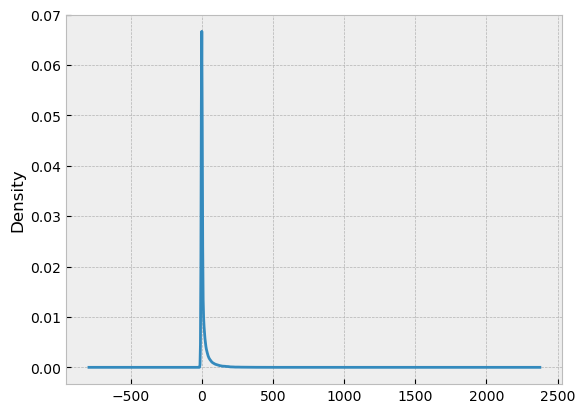

In [24]:
df_airline["Arrival Delay in Minutes"].plot(kind="kde")
df_airline["Arrival Delay in Minutes"].skew()

#### Since the "Arrival Delay in Minutes" is skewed we can do median value imputation 

In [25]:
df_airline["Arrival Delay in Minutes"]=df_airline["Arrival Delay in Minutes"].fillna(df_airline["Arrival Delay in Minutes"].median())

In [26]:
df_airline.isna().sum()/len(df_airline)*100

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

## Checking for outliers and treating it:

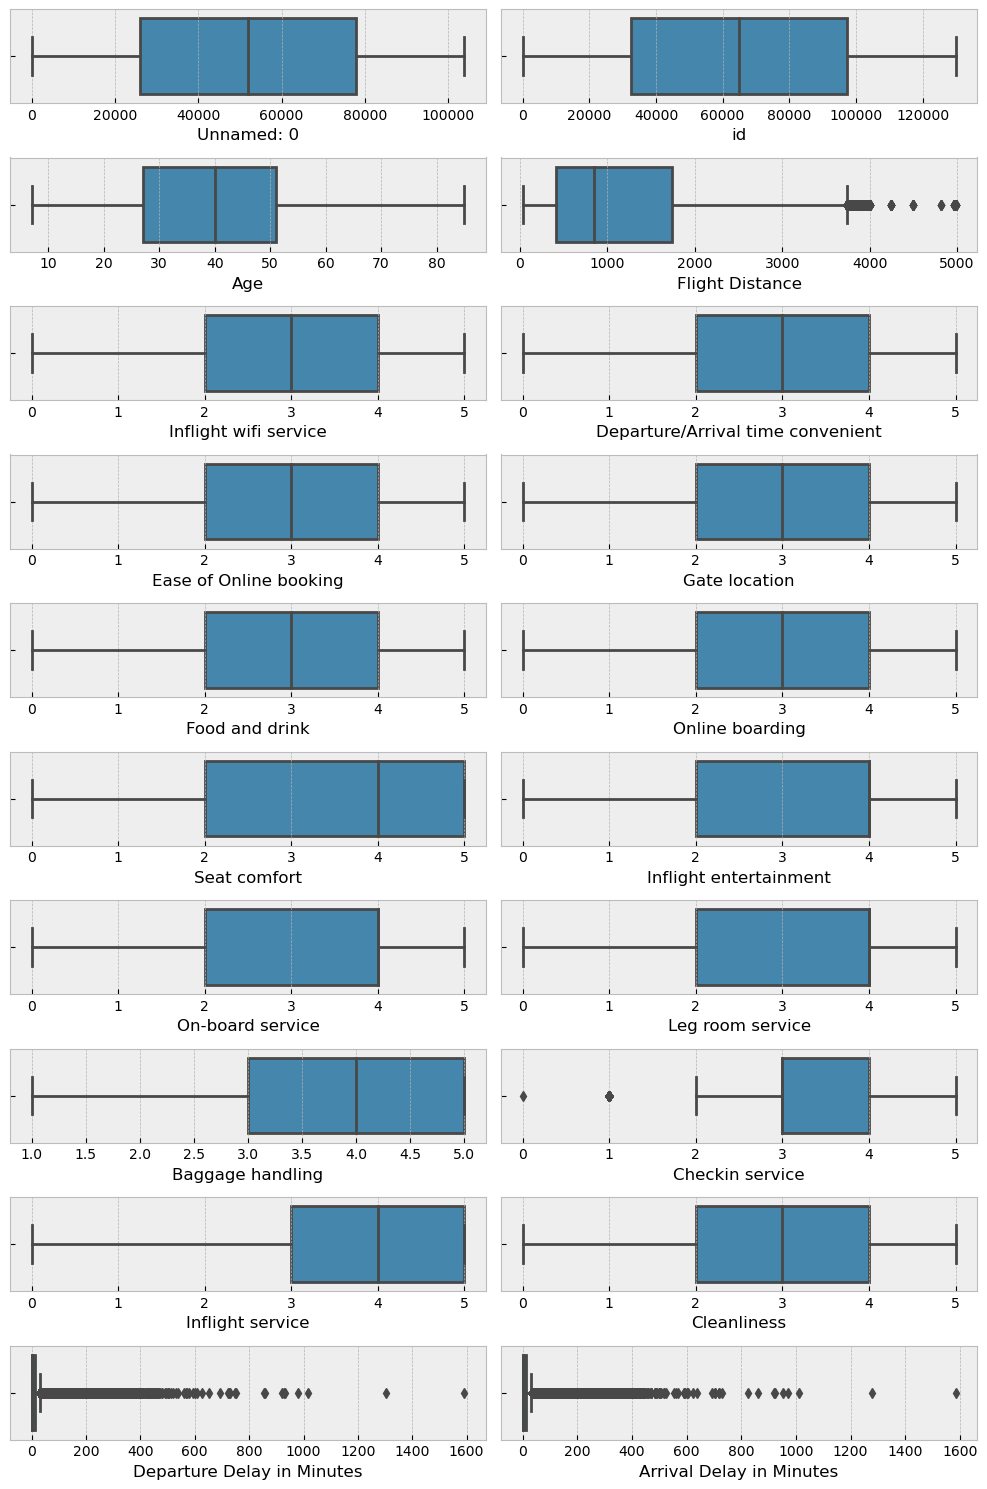

In [27]:
t=1
plt.figure(figsize=(10,15))
for i in df_airline_num:
    plt.subplot(10,2,t)
    sns.boxplot(x=df_airline_num[i])
    t+=1
plt.tight_layout()    
plt.show()

#### From the boxplot we can say that,

* There aren't any negative numbers.



* All the reviews are from 0 to 5 (which is correct).



* The age , departure delay(in minutes),arrival delay(in minutes) and flight distance values are logical.

In [28]:
for i in df_airline_num:
    q1 = df_airline_num[i].quantile(0.25)
    q3 = df_airline_num[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    
    
    outliers = (df_airline_num[i] < ll) | (df_airline_num[i] > ul)
    
    
    df_airline_num[i] = np.where(df_airline_num[i] > ul, df_airline_num[i] - np.mean(df_airline_num[i]), df_airline_num[i])
    
    
    df_airline_num[i] = np.where(df_airline_num[i] < ll, df_airline_num[i] + np.mean(df_airline_num[i]), df_airline_num[i])


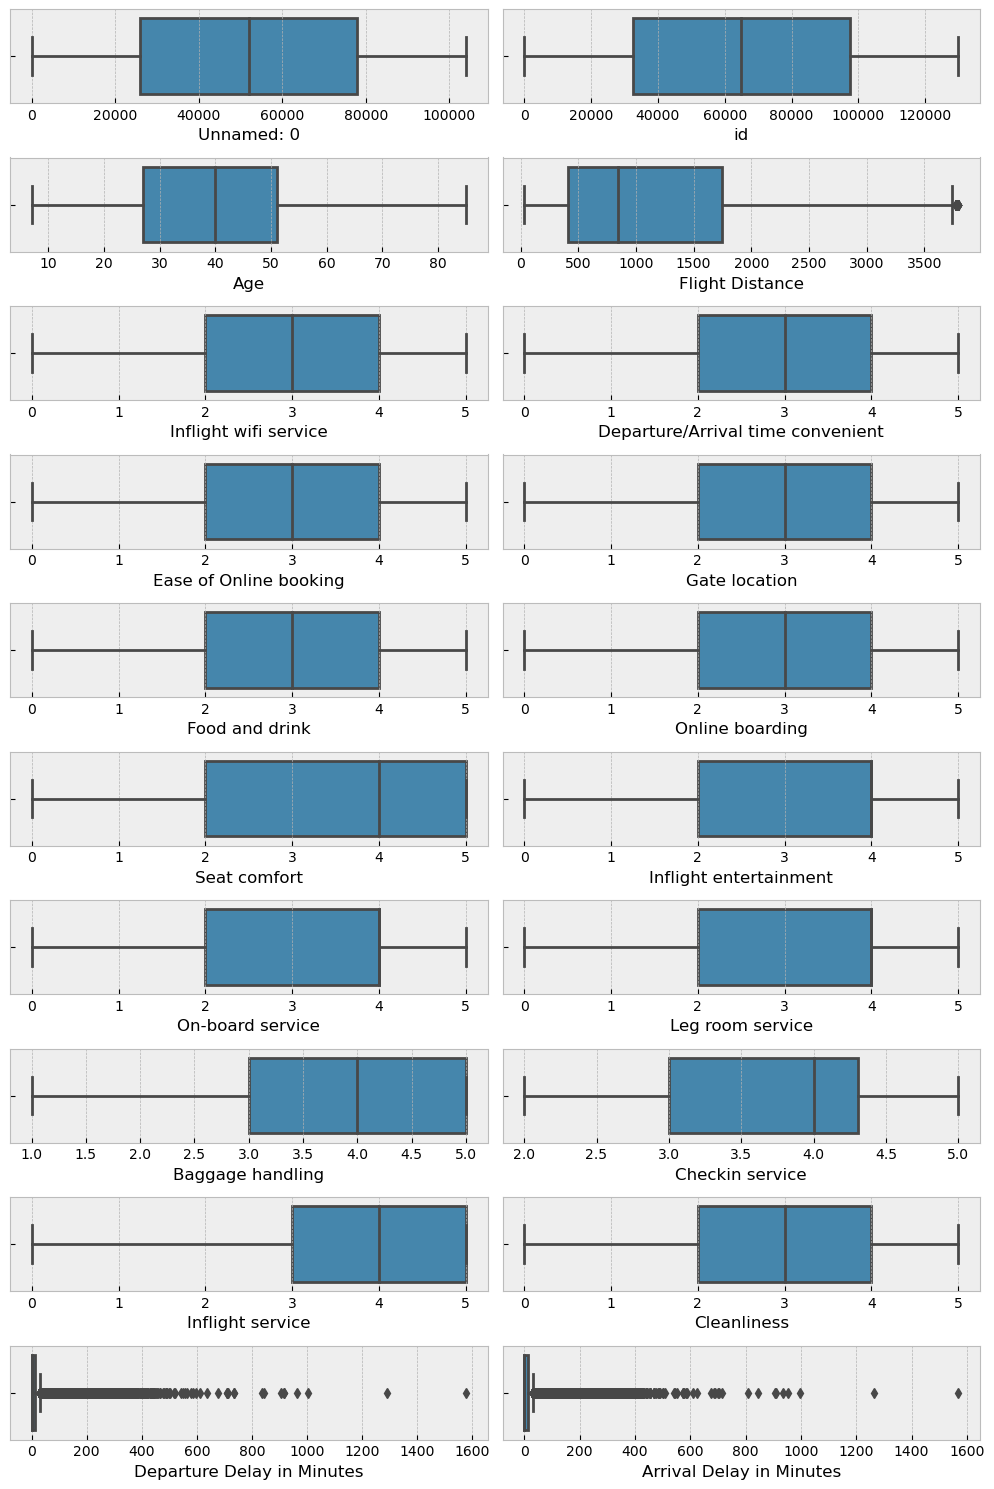

In [29]:
t=1
plt.figure(figsize=(10,15))
for i in df_airline_num:
    plt.subplot(10,2,t)
    sns.boxplot(x=df_airline_num[i])
    t+=1
plt.tight_layout()    
plt.show()

### Analysis:

* From the above plot we can find "flight distance","Checkin service","Departure delay in minutes" and "Arrival delay in minutes" had outliers and we treated with Mean addition and Mean Subtraction.

# Univariate Analysis:

### Numeric 

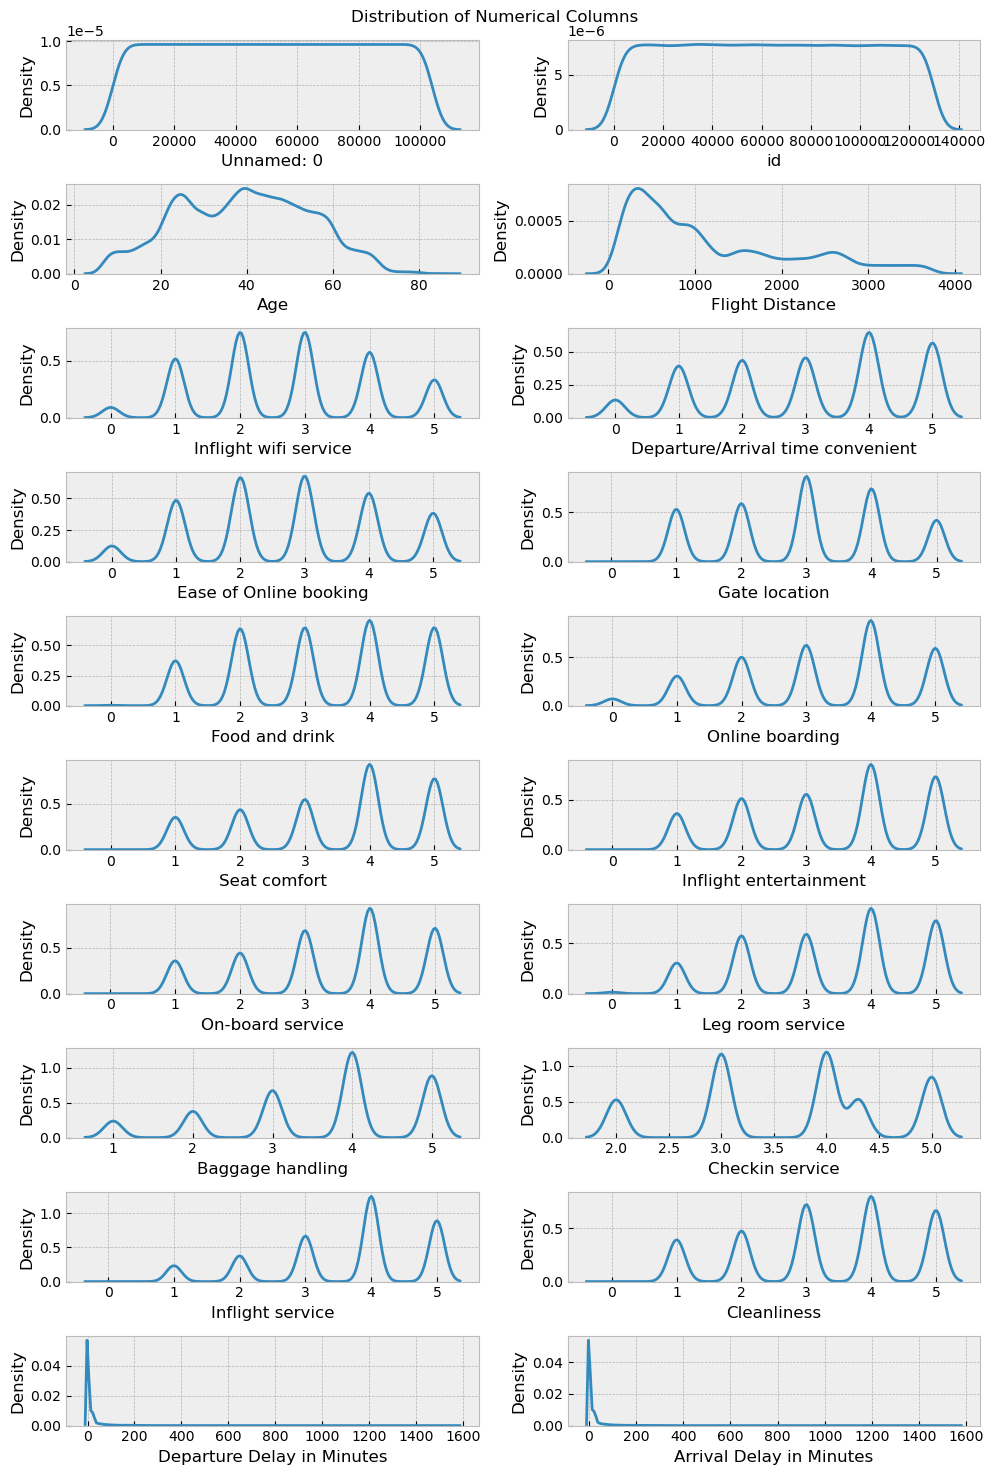

In [30]:
t=1
plt.figure(figsize=(10,15))
for i in df_airline_num:
    plt.subplot(10,2,t)
    sns.kdeplot(x=df_airline_num[i])
    t+=1   
    plt.suptitle("Distribution of Numerical Columns")
plt.tight_layout()    
plt.show()

#### Here the Satisfation rating columns have majority ranked with 4 except density which has ranked majorly with 3

### Categoric

In [31]:
plt.rcParams["figure.figsize"]=[20,10]

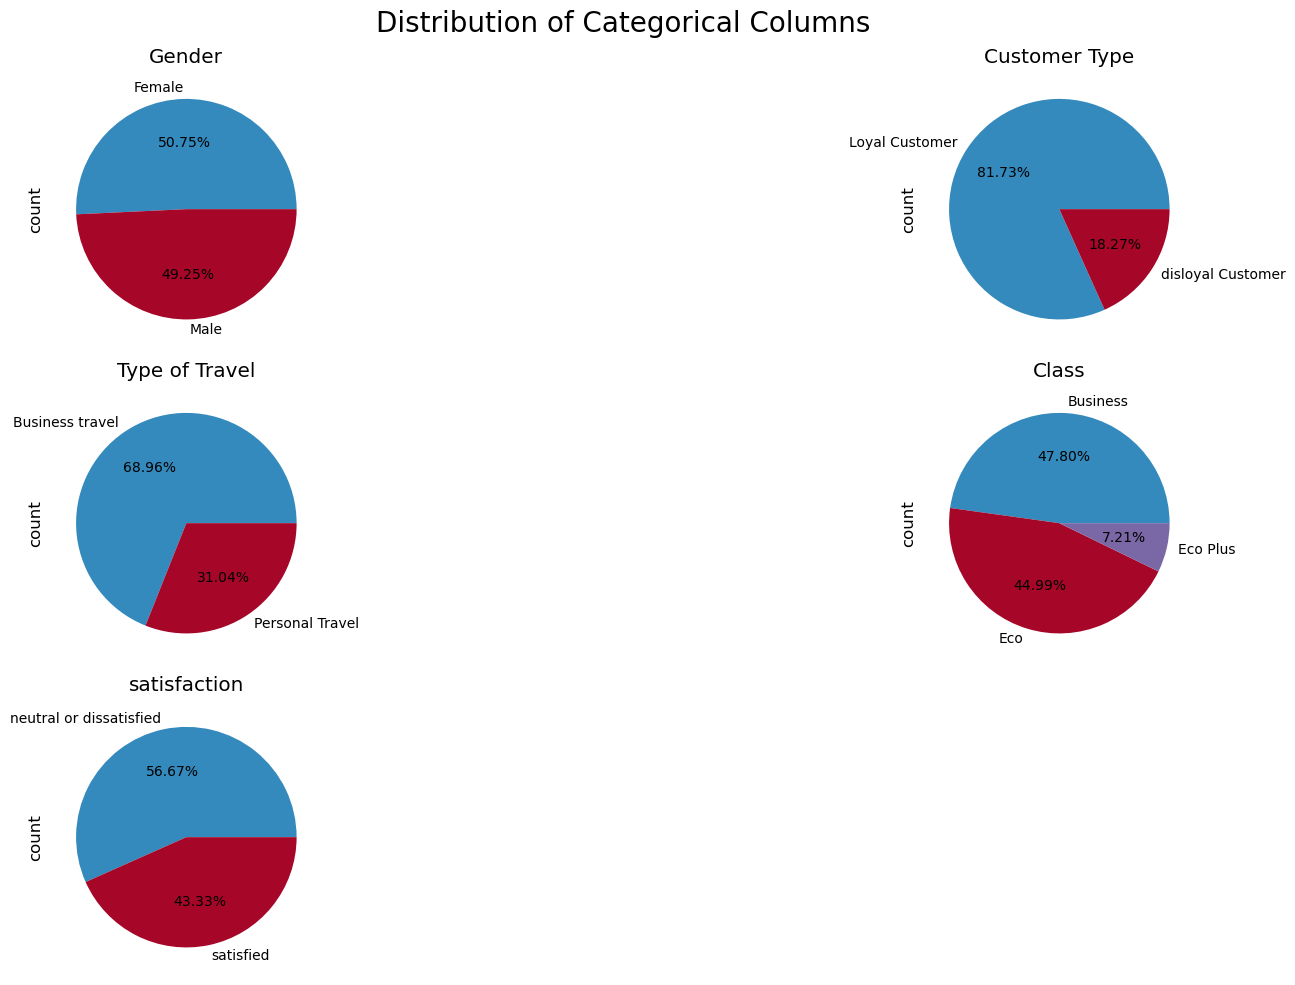

In [32]:
t=1
for i in df_airline_cat:
    plt.subplot(3,2,t)
    df_airline_cat[i].value_counts().plot(kind="pie",autopct='%1.2f%%')
    plt.title(i)
    t+=1
    plt.suptitle("Distribution of Categorical Columns",fontsize=20)
plt.tight_layout()
plt.show()

### Analysis:

* The number of females is slightly higher than the number of males.

* As most of the airline customers are Loyal and less than 20% are disloyal.

* We can see that there are no anomalies in the Ages column (No negative ages or big integers).

* Passengers flying for business purposes are almost triple than those flying for personal.



## Bivariate Analysis

## Cat Vs Cat:

## Type of Customer compared with Class:

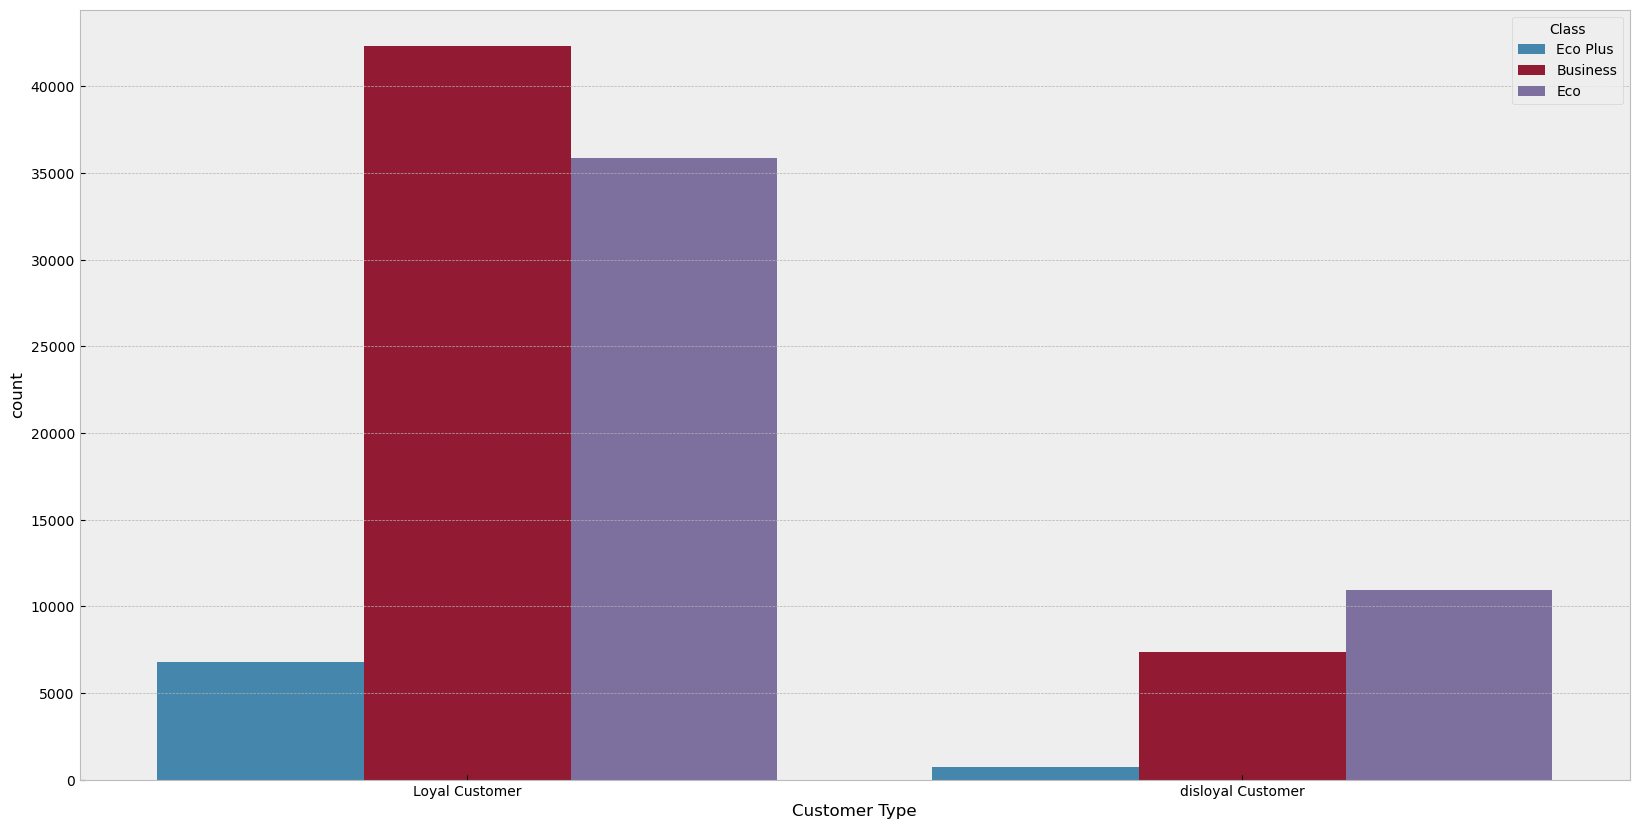

In [33]:
sns.countplot(data=df_airline,x=df_airline['Customer Type'],hue='Class')
plt.show()

## Analysis:

* Most of the loyal customers are from Business Class.
* As from the Univariate analysis itself we can infer about that count of loyal customers are more compared to disloyal customer(less than 20%).
 

## Num Vs Cat:

## Ratings compared to total satisfaction:

In [34]:
temp_1_df_airline=df_airline.copy()
temp_1_df_airline.drop(columns=["Departure Delay in Minutes","Arrival Delay in Minutes"],inplace=True)

Ratings_df_airline=temp_1_df_airline.iloc[:,6:temp_1_df_airline.shape[1]]

Ratings_df_airline.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


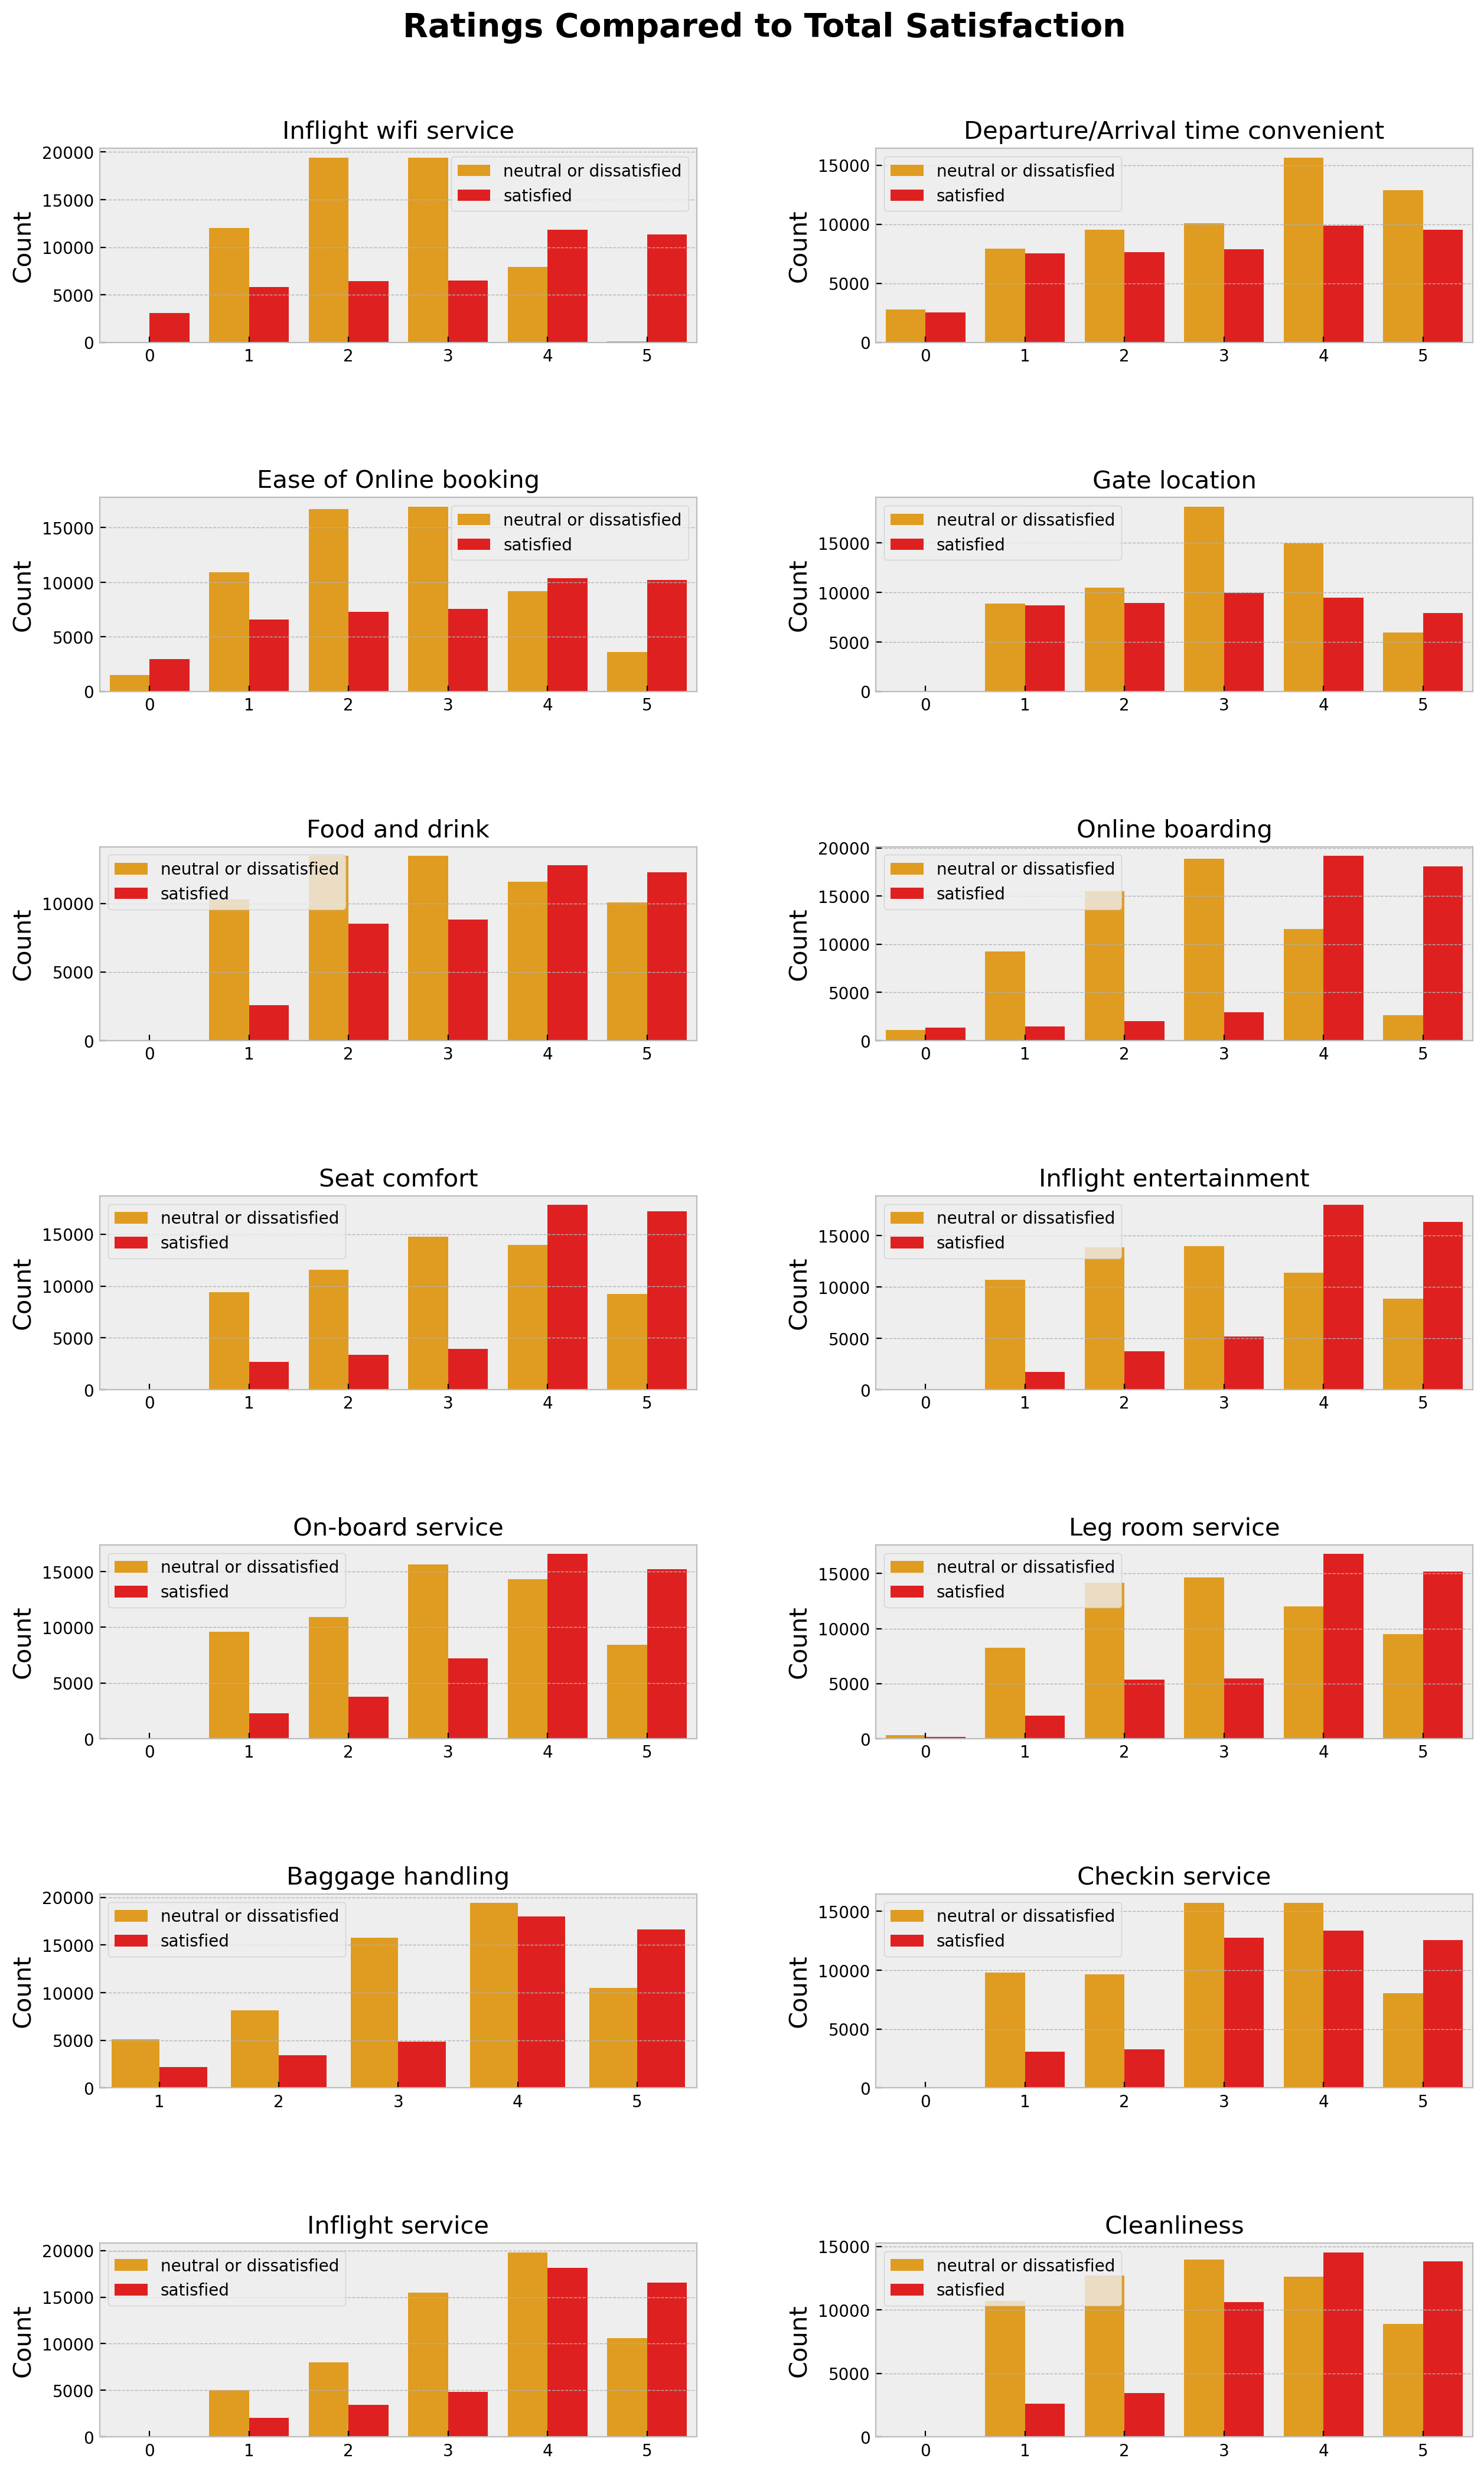

In [35]:
plt.figure(figsize=(15,29),dpi=200)

for i,column in enumerate(Ratings_df_airline):
    if i!=14:
        plt.subplot(8,2,i+1)
        sns.countplot(x=column,hue='satisfaction',data=Ratings_df_airline,palette=["orange","red"])
        plt.title(column,size=15)
        plt.legend(fontsize='10')
        plt.xlabel('')
        plt.ylabel('Count',size=15)
    
plt.subplots_adjust(hspace = 0.8, wspace=0.3)
plt.suptitle("Ratings Compared to Total Satisfaction",size=20,fontweight='bold',y=0.92)
plt.show()

### Analysis:

* The majority of the reviews are positive and neutral (3-5). 

* Passengers with a bad experience are mostly neutral or dissatisfied, but since negative ratings are much less compared to the positive.

* When it comes to the overall satisfaction and experience of the passenger 60% of them are neutral or dissatisfied and 40% satisfied. 
* There aren't any categories in which the airline has received overall negative feedback, with most of the reviews being in the range of 3 to 5. 
* With that mind the airline should focus on improving the categories that have the biggest impact on the experience of the passenger and therefore the overall satisfaction and some of those categories are Seat Comfort, Leg Room Service, Cleanliness, Online Boarding and Baggage Handling. 


# Ratings Satisfaction compared with Gender base:

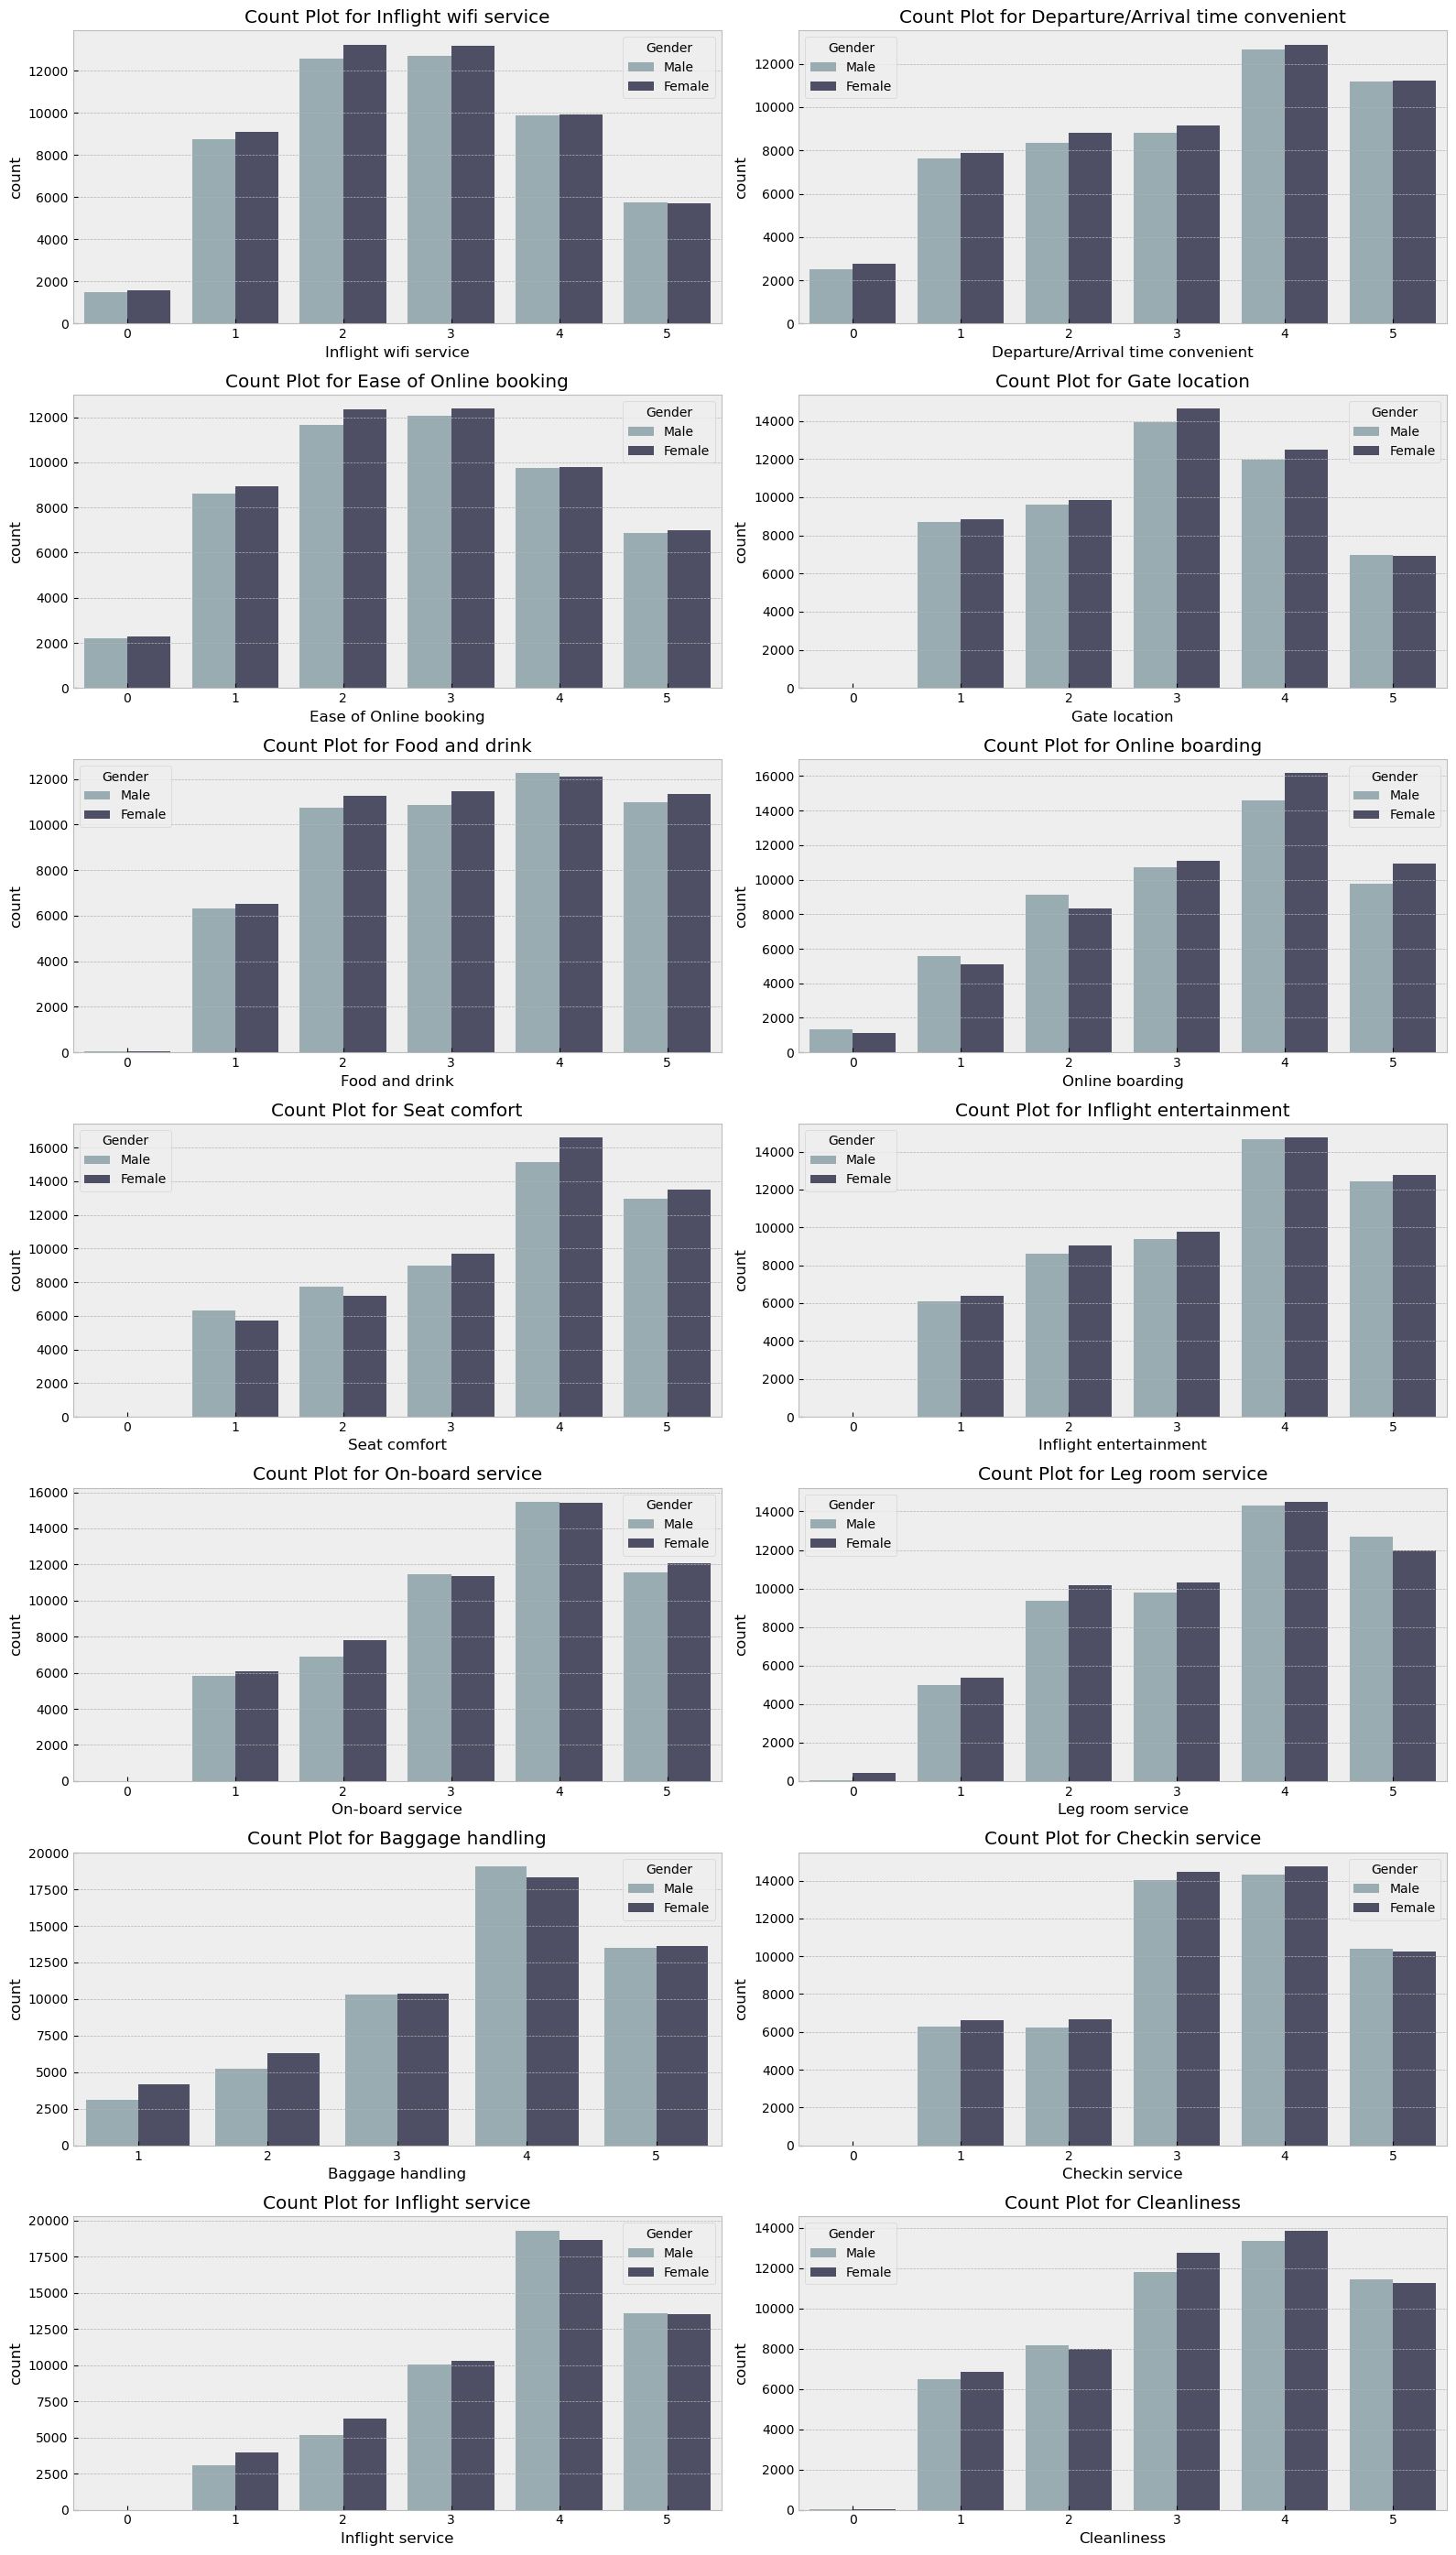

In [36]:
fig, axes=plt.subplots(nrows=7, ncols=2, figsize=(16, 28))
axes=axes.flatten()
for i,j in enumerate(Ratings_df_airline):
    if i!=14:
        sns.countplot(x=j, data=df_airline,hue="Gender",palette="bone_r",ax=axes[i])
        axes[i].set_title(f"Count Plot for {j}")
plt.tight_layout()
plt.show()

## Reason for travelling comapared with Age

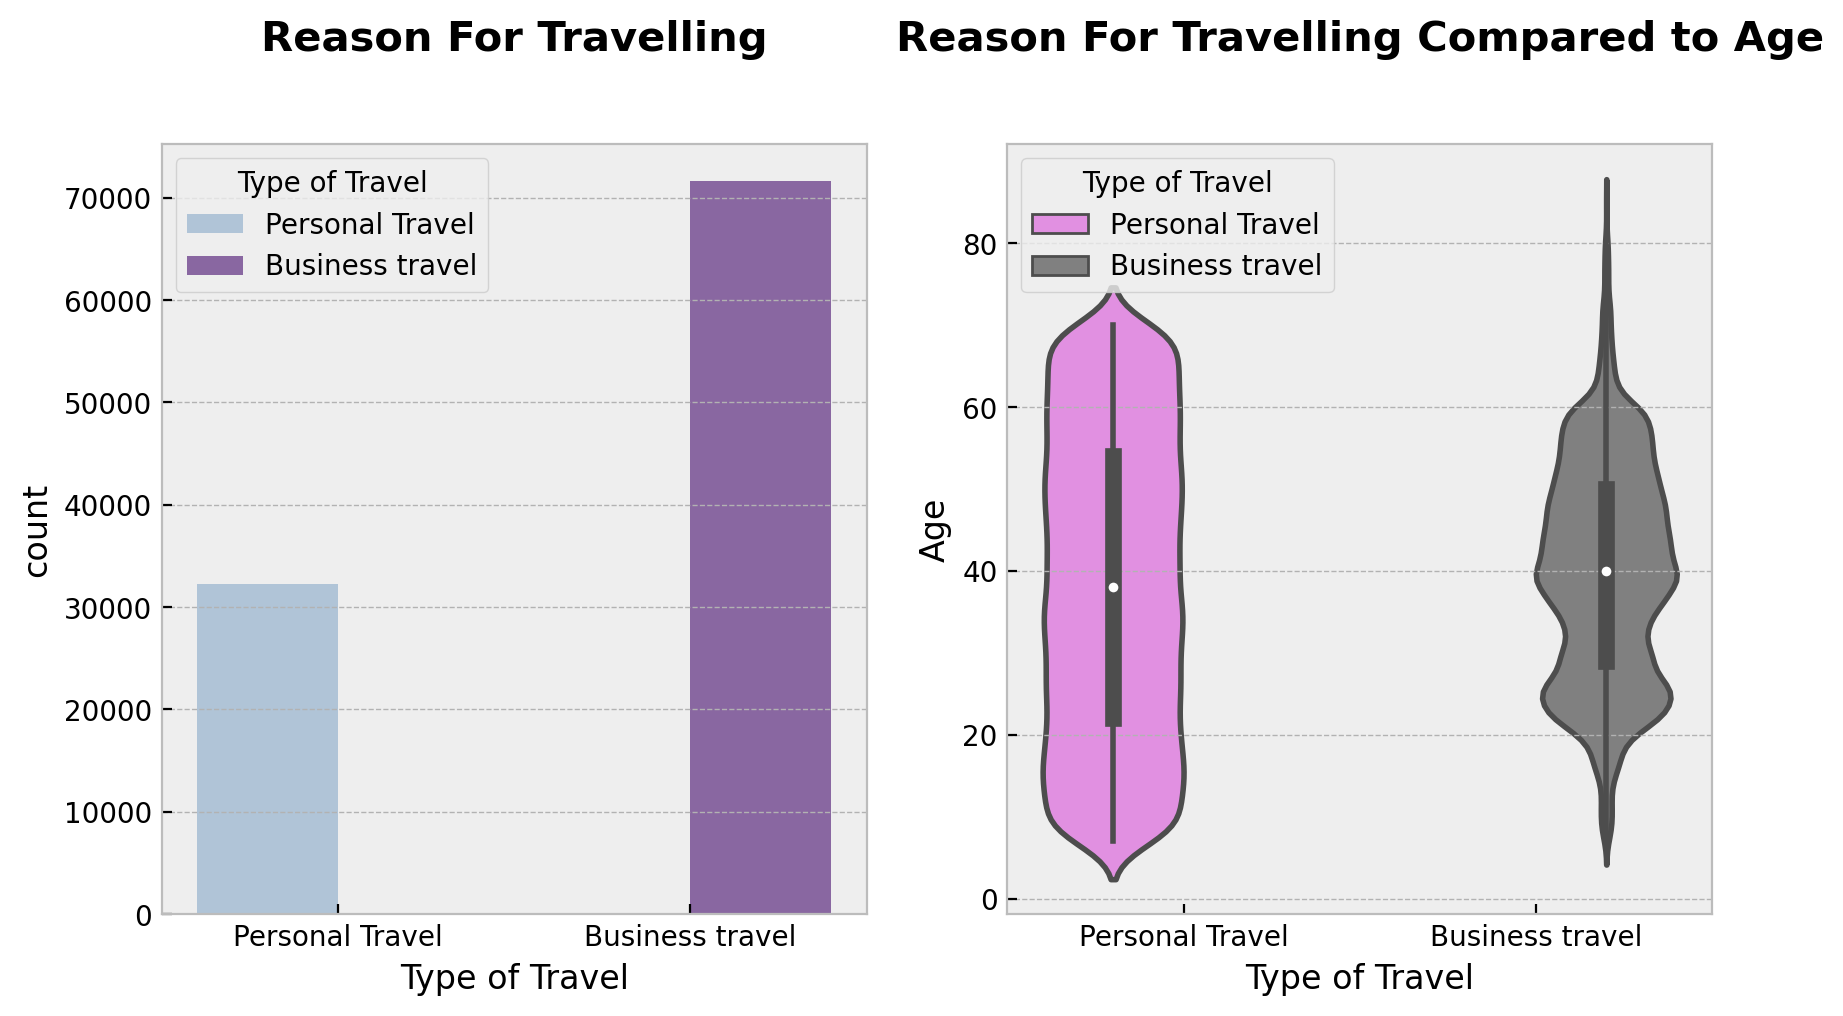

In [37]:
plt.figure(figsize=(10,5),dpi=200)

plt.subplot(1,2,1)


plt.title('Reason For Travelling',size=15,fontweight='bold',y=1.1)
sns.countplot(x='Type of Travel',hue='Type of Travel',data=df_airline,palette='BuPu')

plt.subplot(1,2,2)


plt.title('Reason For Travelling Compared to Age',size=15,fontweight='bold',y=1.1)

sns.violinplot(x='Type of Travel',y='Age',hue='Type of Travel',data=df_airline,palette=["violet","grey"])

plt.show()

## Analysis:

* Passengers flying for business purposes are almost triple than those flying for personal.

* Number of passengers flying for personal reasons is consinstent at any age.

* Most passengers flying for business are between 25-60.

## Class Flight Distance:

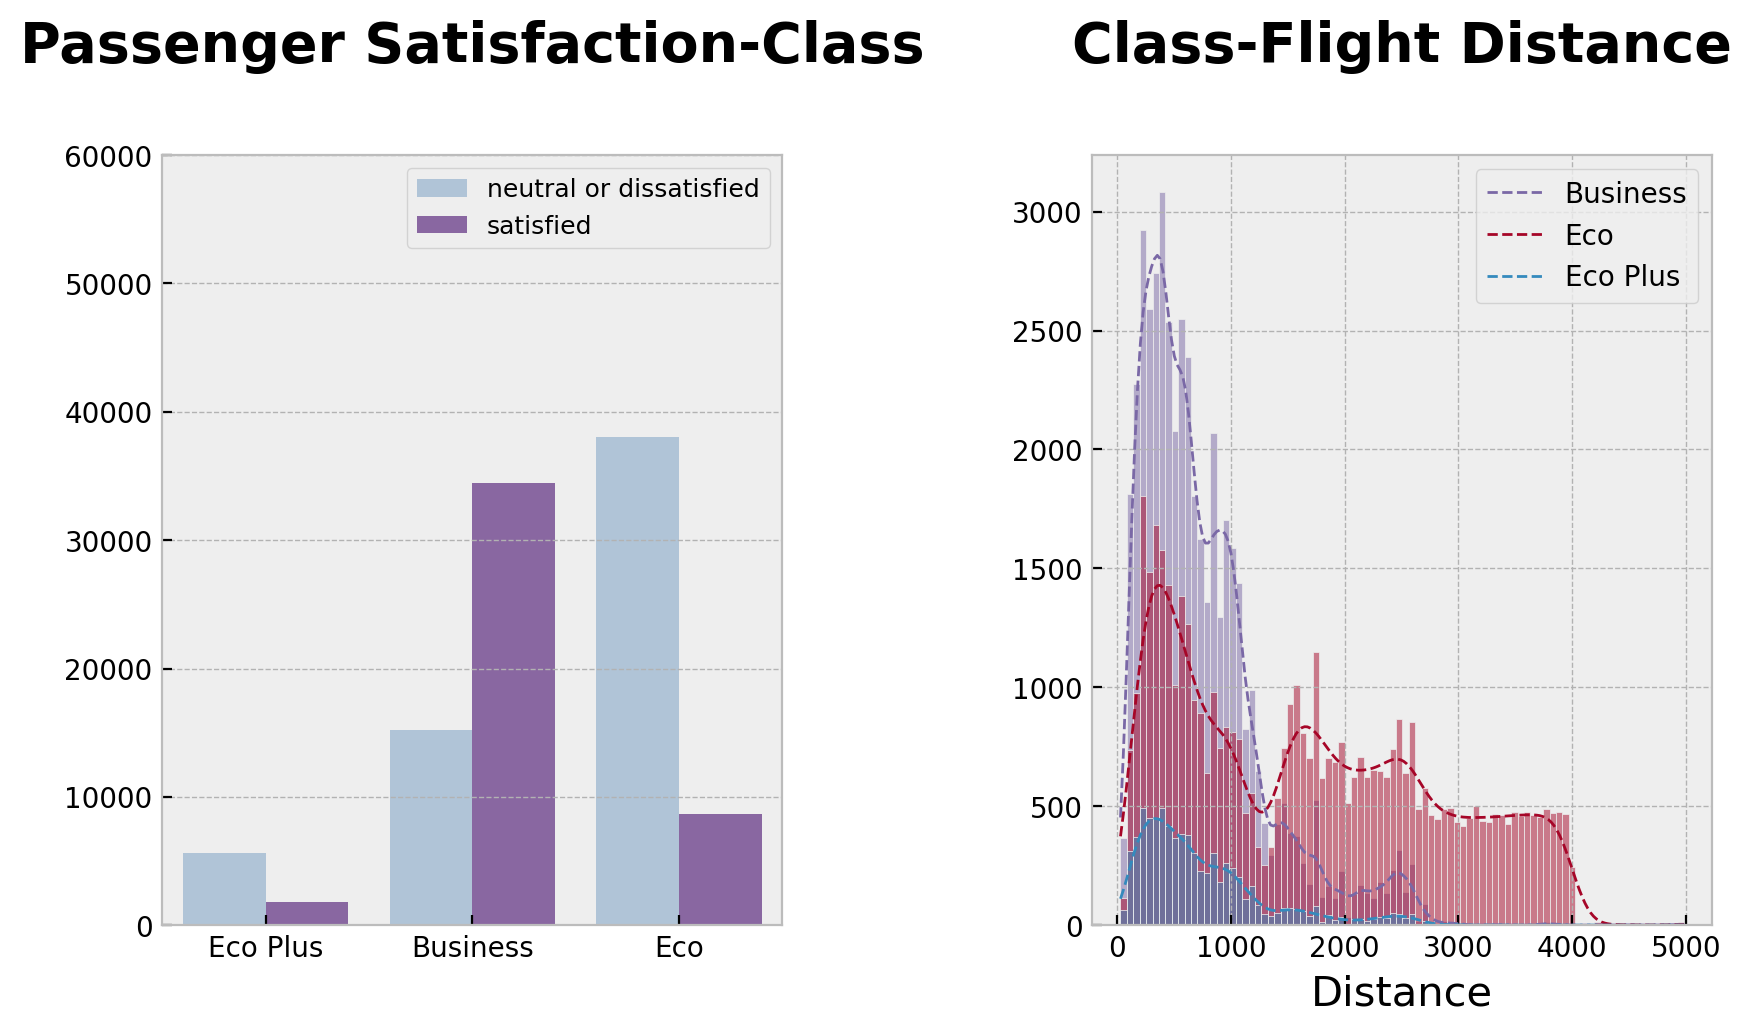

In [38]:
plt.figure(figsize=(10, 5),dpi=200)


plt.subplot(1,2,1)

plt.title('Passenger Satisfaction-Class',size=20,fontweight='bold',y=1.1)

sns.countplot(x='Class',hue='satisfaction',data=df_airline,palette="BuPu")
plt.xlabel('')
plt.ylabel('')

plt.yticks(np.arange(0,70000,10000))

plt.legend(fontsize='9')


plt.subplot(1,2,2)


plt.title('Class-Flight Distance',size=20,fontweight='bold',y=1.1)

sns.histplot(x='Flight Distance',data=df_airline,hue='Class',pmax=.1,kde=True,line_kws={'lw': 1,'linestyle':'--'})

plt.ylabel('',size=15)
plt.xlabel('Distance',size=15)


plt.subplots_adjust(hspace = 0.6, wspace=0.5)

plt.legend(['Business', 'Eco','Eco Plus' ],fontsize='10')

plt.show()

## Analysis:

* Very few people fly in the economy plus class. They usually prefer Economy or Business.

* More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.

* Passengers that fly for long distances almost always prefer business class. Probably because it is more comfortable.

## Satisfaction based on delay:

In [39]:
departure_delay_pct=round((df_airline.loc[df_airline['Departure Delay in Minutes']>60].shape[0]/df_airline.shape[0])*100,2)
arrival_delay_pct=round((df_airline.loc[df_airline['Arrival Delay in Minutes']>60].shape[0]/df_airline.shape[0])*100,2)
print('Delay over an hour long:\n')
print(f'Departure delay: {departure_delay_pct} %')
print(f'Arrival delay: {arrival_delay_pct} %')

Delay over an hour long:

Departure delay: 6.97 %
Arrival delay: 7.05 %


## Insights:

• We can see that delays over an hour are at a small percentage, which is a good thing.


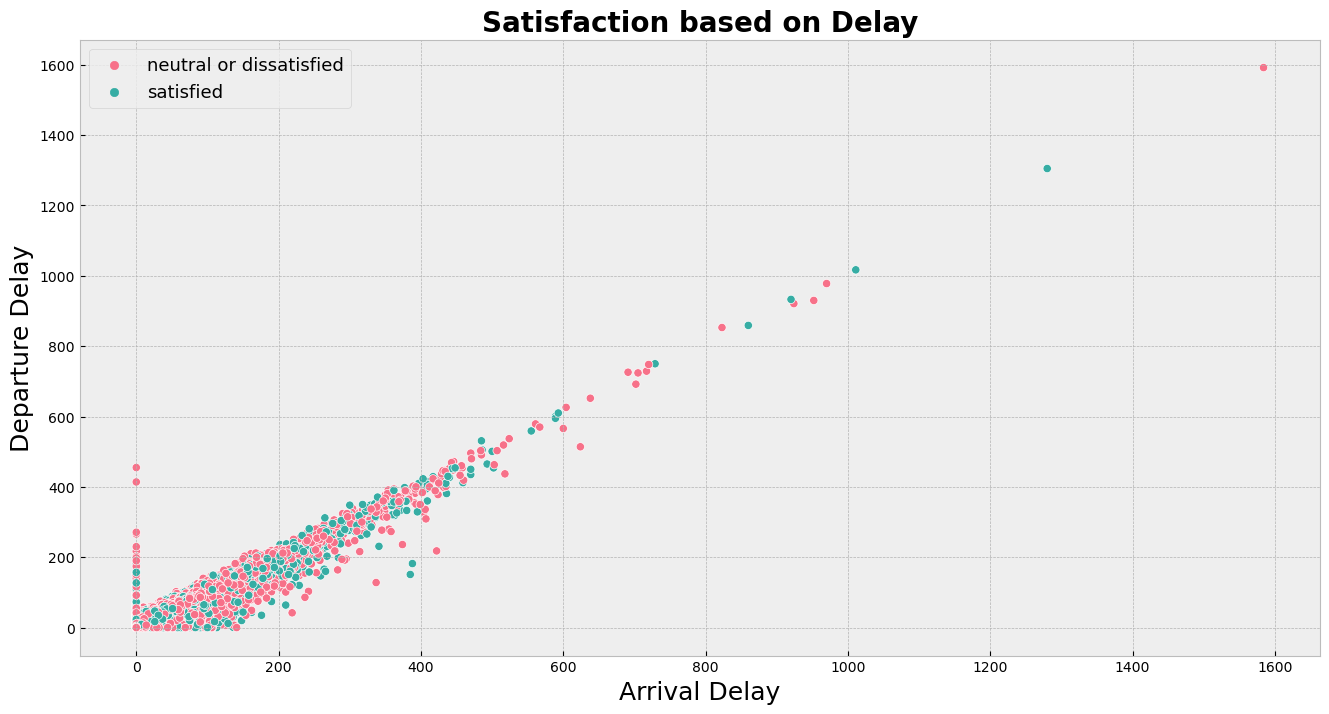

In [40]:
plt.figure(figsize=(16,8))

plt.title('Satisfaction based on Delay',size=20,fontweight='bold')

sns.scatterplot(y='Departure Delay in Minutes',data=df_airline,x='Arrival Delay in Minutes',hue='satisfaction',palette="husl")

plt.xlabel('Arrival Delay',size=18)
plt.ylabel('Departure Delay',size=18)

plt.legend(fontsize='13')
plt.show()

## Analysis:

* The longer the delay is more people are Dissatisfied (or Neutral) and less are Satisfied, which is expected.

## Multivariate Analysis:

## Heatmaps:

* Making a Dataframe with only the numerical columns in order to draw the heatmap.

* Also replacing The satisfaction column Satisfied and Neutral or Dissatisfied with 1 and 0 correspondingly.

In [41]:
df_airline["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [42]:
temp_df_airline=df_airline.copy()
temp_df_airline['satisfaction']=temp_df_airline['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

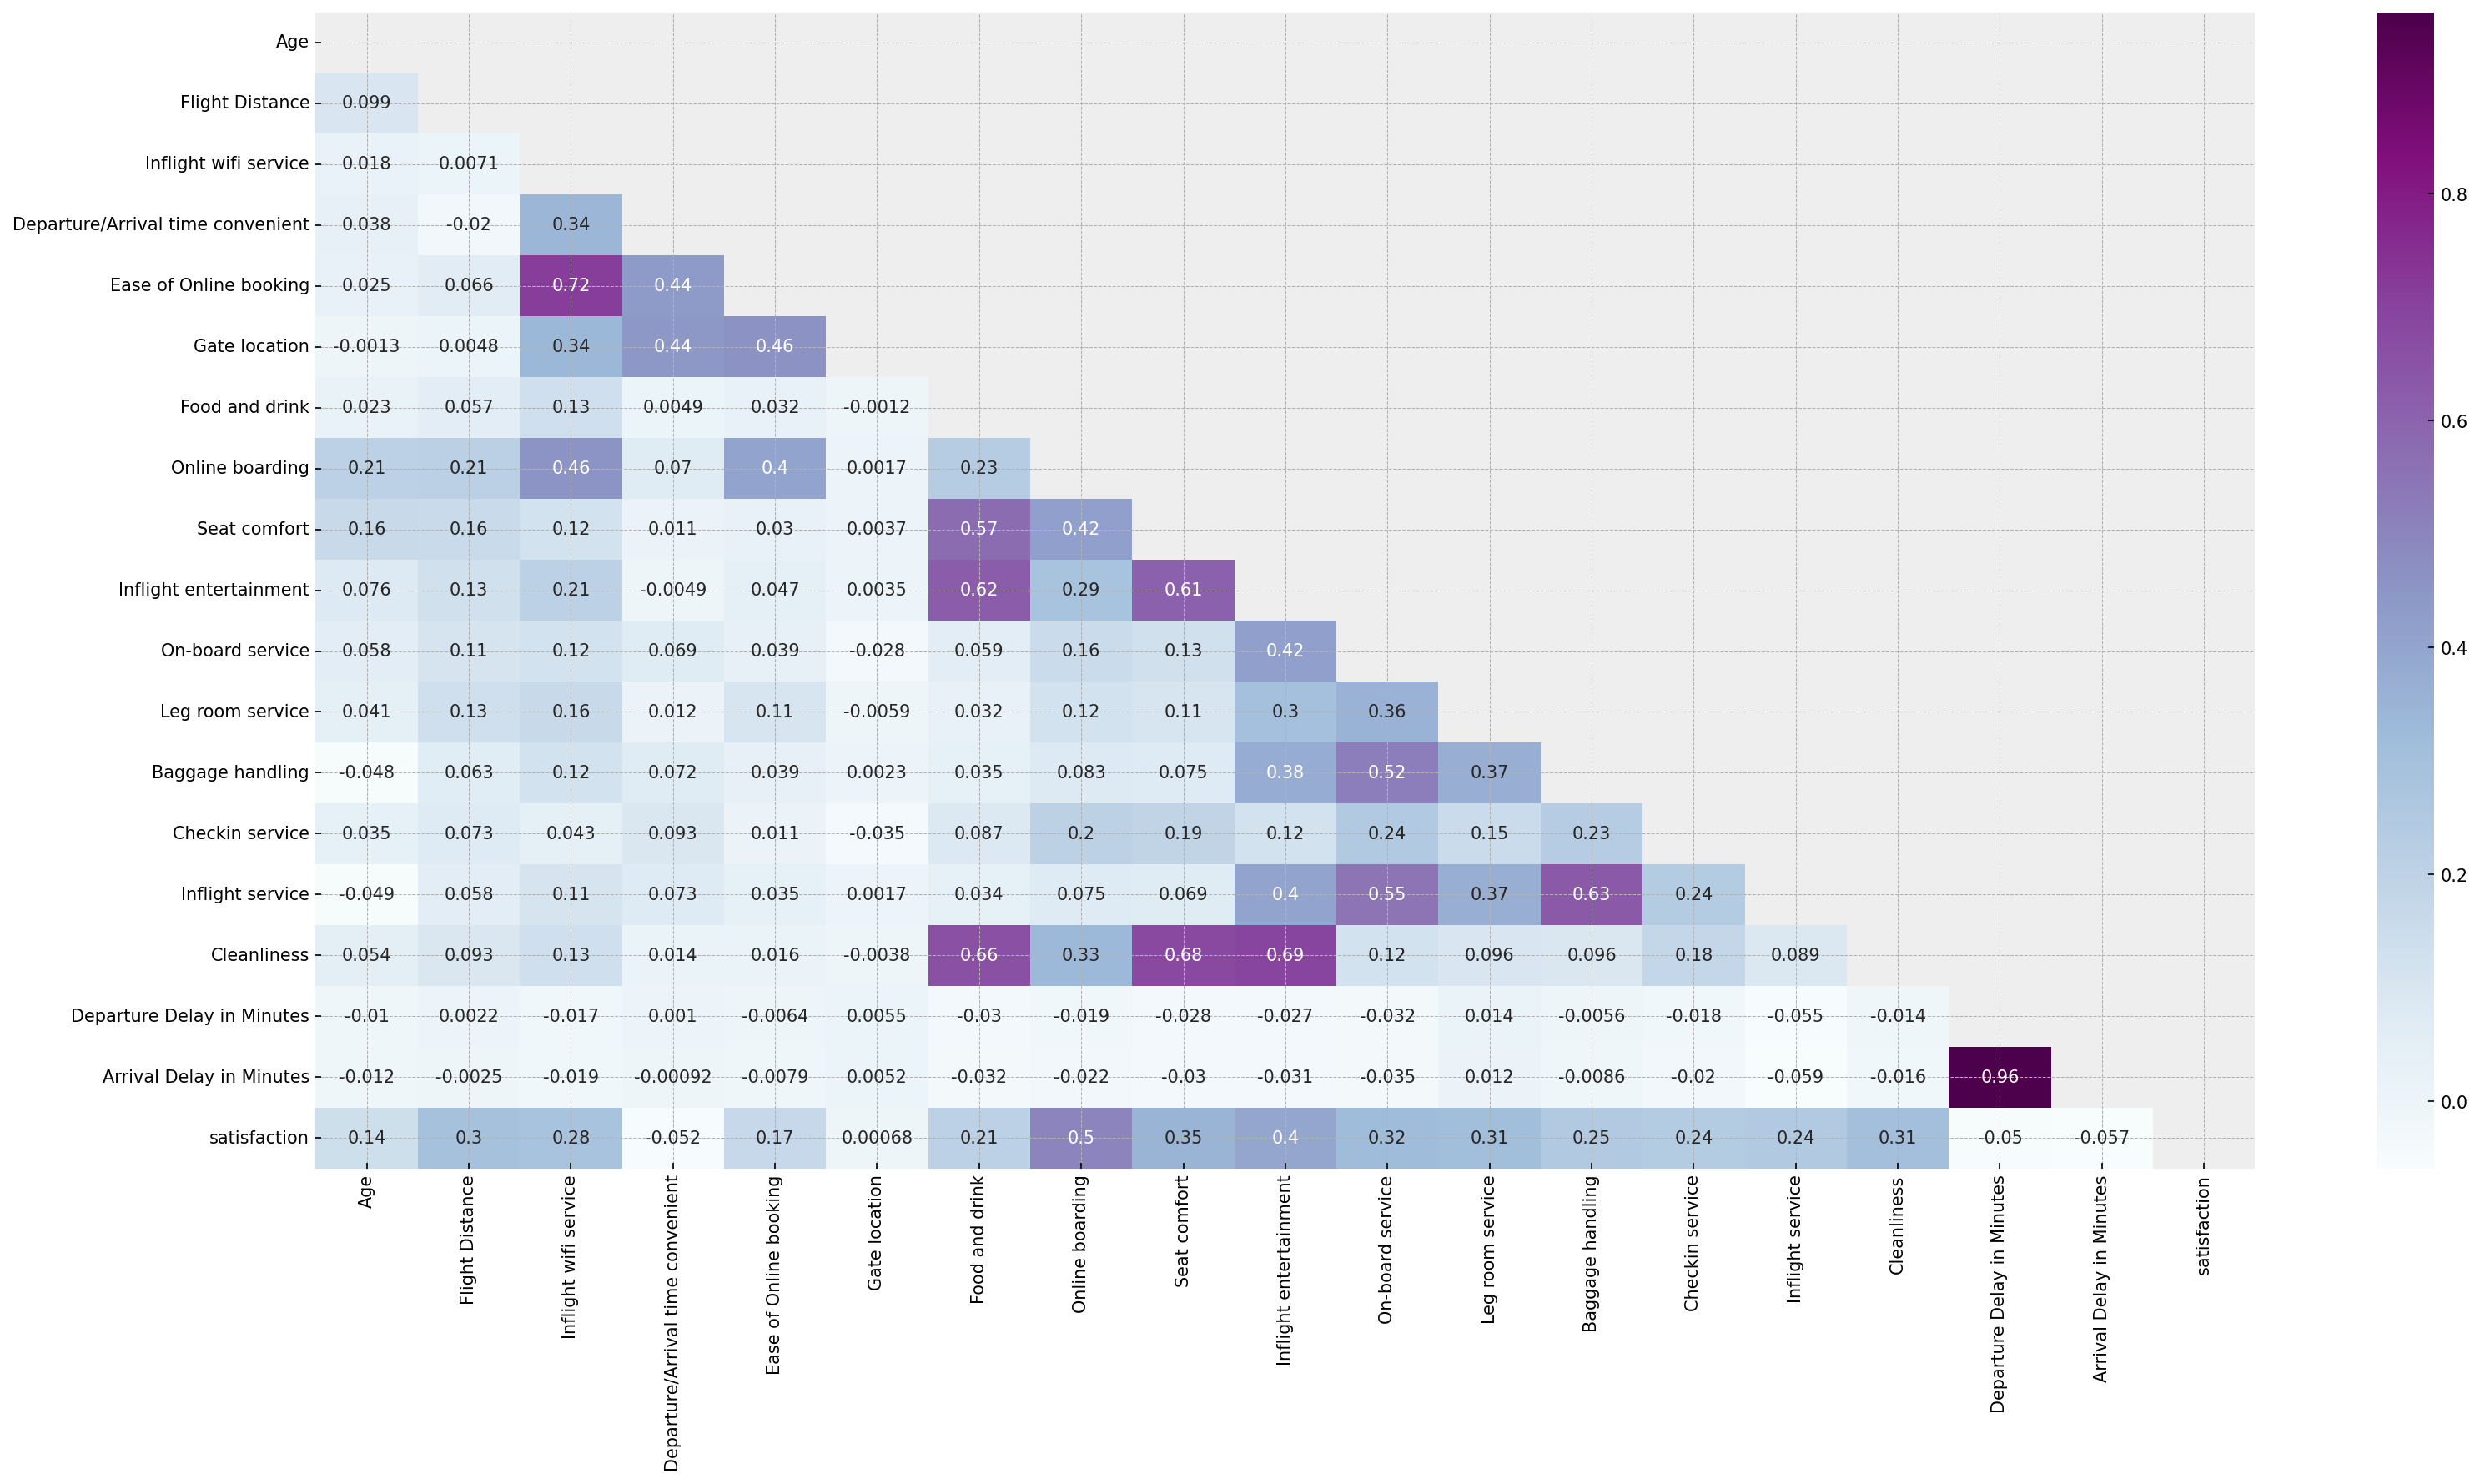

In [43]:

numerical_df_airline=temp_df_airline._get_numeric_data().corr()

mask = np.triu(numerical_df_airline)

plt.figure(figsize=(25,12),dpi=150)

sns.heatmap(numerical_df_airline,mask=mask,cmap='BuPu',annot=True)

plt.show()


### Observations:

* We can see that there is a match between arrival delay and departure delay which is expected.
* Food and Drink is associated with In-Flight Entertainment.
* There is a correlation between Seat Comfort and Cleanless.
* Passenger satisfaction is dependent on all of the features of the dataset (Online Boarding, Seat Comfort etc.) almost equally.

## Statistical Tests:

In [44]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import ttest_ind
from scipy.stats import pearsonr


### Type of travel vs satisfaction:

#### H0: Type of Travel and satisfaction are independent
#### H1: Type of Travel and satisfaction are not independent

In [45]:
table=pd.crosstab(df_airline["Type of Travel"],df_airline["satisfaction"])
test_stat,p_value,dof,expected_value=chi2_contingency(observed =table)
print('Test statistic:',test_stat)
print('p_value:',p_value)
print('Degrees of freedom:',dof)
print('Expected_values:',expected_value)

Test statistic: 20945.233826061667
p_value: 0.0
Degrees of freedom: 1
Expected_values: [[40604.54597513 31050.45402487]
 [18274.45402487 13974.54597513]]


* Here the pval is  less than 0.05 we can reject null hypothesis.(Hence we can say that Type of Travel and satisfaction are not independent)

### Customer type vs Gender:

#### H0: Customer Type  and Gender are independent
#### H1: Customer Type  and Gender are not independent

In [46]:
table=pd.crosstab(df_airline["Customer Type"],df_airline["Gender"])
test_stat,p_value,dof,expected_value=chi2_contingency(observed =table)
print('Test statistic:',test_stat)
print('p_value:',p_value)
print('Degrees of freedom:',dof)
print('Expected_values:',expected_value)

Test statistic: 104.45713039746121
p_value: 1.6063153933688893e-24
Degrees of freedom: 1
Expected_values: [[43094.92436287 41828.07563713]
 [ 9632.07563713  9348.92436287]]


* Here the pval is  less than 0.05 we can reject null hypothesis.(Hence we can say that Customer Type  and Gender are not independent)

In [47]:
import warnings
warnings.filterwarnings('ignore')

### Departure Delay in Minutes vs Satisfaction

#### H0: Data is normal
#### H1: Data is not  normal

In [48]:
stat,p_value=stats.shapiro(df_airline['Departure Delay in Minutes'])
stat,p_value

(0.4233558773994446, 0.0)

* pvalue is less than alpha, so we reject null hypothesis 'Departure Delay in Minutes' is not normally distrubuted

#### H0: The mean departure delay in minutes for satisfied passengers is equal to the mean departure delay in minutes for neutral or dissatisfied passengers.
#### H1: The mean departure delay in minutes for satisfied passengers is not equal to the mean departure delay in minutes for neutral or dissatisfied passengers.

In [49]:
satisfied = df_airline[df_airline['satisfaction'] == 'satisfied']['Departure Delay in Minutes']
dissatisfied = df_airline[df_airline['satisfaction'] == 'neutral or dissatisfied']['Departure Delay in Minutes']
t_stat, p_value = ttest_ind(satisfied, dissatisfied)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -16.297008708001414
p-value: 1.2293455496744597e-59


* pvalue is less than alpha, so we reject null hypothesis H0.
*  So,mean of the Departure delay in minutes for satisfied passengers is not equal to the mean departure delay in minutes for neutral or dissatisfied passengers.

### Departure Delay in Minutes vs Arrival Delay in Minutes

#### H0: mu_diff=0 (The mean departure delay in minutes is equal to the mean arrival delay in minutes.)
#### H1: mu_diff!=0(The mean departure delay in minutes is not equal to the mean arrival delay in minutes.)

In [50]:
df_airline['Departure Delay in Minutes'].mean()


14.815618263012011

In [51]:
df_airline['Arrival Delay in Minutes'].mean()

15.133392362180475

## Shapiro

#### H0: Data is normal
#### H1: Data is not  normal

In [52]:
stat,p_value=stats.shapiro(df_airline['Departure Delay in Minutes'])
stat,p_value

(0.4233558773994446, 0.0)

In [54]:
stat,p_value=stats.shapiro(df_airline['Arrival Delay in Minutes'])
stat,p_value

(0.4271466135978699, 0.0)

* Pvalue is less than 0.05. Data is not normal

## Levene test

#### H0: Both the variances are equal
#### H1: variances are not equal

In [55]:
stat,p_value=stats.levene(df_airline['Departure Delay in Minutes'],df_airline['Arrival Delay in Minutes'])
stat,p_value

(3.5501930420315055, 0.05953991775605023)

* p_value< is greater than 0.05, we fail to reject Null hypothesis(Ho).
* Hence both the variances are equal

In [56]:
departure_delay = df_airline['Departure Delay in Minutes']
arrival_delay = df_airline['Arrival Delay in Minutes']

t_statistic, p_value = stats.ttest_rel(departure_delay, arrival_delay)

print("T-Statistic:", t_statistic)
print("p-value:", p_value)


T-Statistic: -9.443443581778752
p-value: 3.6784717153581385e-21


* pvalue is less than 0.05, we reject Null hypothesis(Ho).
* So,the mean departure delay in minutes is not equal to the mean arrival delay in minutes

### Chi-Square Test for Independence

#### H0: The satisfaction  and gender are independent.

#### H1: The satisfaction  and gender are dependent.

In [57]:
print("Chi-Square Test for Independence:")
contingency_table = pd.crosstab(df_airline['satisfaction'], df_airline['Gender'])
chi2_statistic, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value_chi2)


Chi-Square Test for Independence:
Chi-square statistic: 15.44441742614322
p-value: 8.496755458033522e-05


* pvalue is less than 0.05, we reject Null hypothesis(Ho).
* The satisfaction  and gender are not independent.

In [58]:
df_airline.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Encoding:

In [59]:
df_encoded=pd.get_dummies(df_airline).replace({True:1,False:0})

In [60]:
df_encoded.drop(columns=["Gender_Male","Customer Type_disloyal Customer","Type of Travel_Personal Travel","satisfaction_neutral or dissatisfied"],inplace=True,axis=1)

In [61]:
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,25,18.0,0,1,0,0,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,1,6.0,0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,5,0,0.0,1,1,1,1,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,2,11,9.0,1,1,1,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,0,0.0,0,1,1,1,0,0,1


## Base Model:

### Model Building before scaling and transformation:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import classification_report

In [65]:
x=df_encoded.drop(columns="satisfaction_satisfied",axis=1)
y=df_encoded["satisfaction_satisfied"]

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,stratify=y,train_size=0.70)

## Logistic Regression:

In [67]:
log_reg=LogisticRegression()
log_reg.fit(xtrain,ytrain)

ypred=log_reg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     17664
           1       0.74      0.78      0.76     13508

    accuracy                           0.79     31172
   macro avg       0.78      0.79      0.78     31172
weighted avg       0.79      0.79      0.79     31172



## Scaling and Transformation:

#### Checking the skewness:

In [68]:
for i in df_encoded:
    print(f"Skeweness of {i} : {df_encoded[i].skew()}")
    if df_encoded[i].skew()> 0:
        print("Positively skewed","\n")
    else:
        print("Negatively skewed","\n")

Skeweness of Age : -0.0045161270723468785
Negatively skewed 

Skeweness of Flight Distance : 1.1094656676620138
Positively skewed 

Skeweness of Inflight wifi service : 0.04040802157677806
Positively skewed 

Skeweness of Departure/Arrival time convenient : -0.3343986321806541
Negatively skewed 

Skeweness of Ease of Online booking : -0.018294273338363996
Negatively skewed 

Skeweness of Gate location : -0.05888941158110646
Negatively skewed 

Skeweness of Food and drink : -0.1512794969916901
Negatively skewed 

Skeweness of Online boarding : -0.4538516953450536
Negatively skewed 

Skeweness of Seat comfort : -0.4827753881598993
Negatively skewed 

Skeweness of Inflight entertainment : -0.3651305876540764
Negatively skewed 

Skeweness of On-board service : -0.420030745122613
Negatively skewed 

Skeweness of Leg room service : -0.35023134460896793
Negatively skewed 

Skeweness of Baggage handling : -0.6770398943760938
Negatively skewed 

Skeweness of Checkin service : -0.364981960773832

#### Applying ZScore scaling:

In [69]:
from scipy.stats import zscore 

In [70]:
feature=df_encoded.drop(columns="satisfaction_satisfied")

In [71]:
df_scaled=feature.apply(zscore)
df_scaled

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.156436,1.305870,0.266393,0.074169,-1.015031,0.472767,-1.490614,-0.956906,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0.305848,-1.742292,-0.361375,-0.236313,-1.015031,-2.115208,0.670865,1.045034,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.305848,1.305870,-0.387532,-0.391554,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,0.305848,-0.980251,-0.099805,-0.158692,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.544740,-0.218211,-0.387532,-0.391554,-1.015031,0.472767,0.670865,1.045034,-0.904327,-0.278802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.544740,-0.980251,-0.309061,-0.391554,0.985192,-2.115208,0.670865,-0.956906,1.105795,-0.278802
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,1.156436,0.543829,-0.387532,-0.391554,-1.015031,0.472767,0.670865,1.045034,-0.904327,-0.278802
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,1.156436,0.543829,-0.204433,-0.029325,-1.015031,-2.115208,0.670865,1.045034,-0.904327,-0.278802
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,0.305848,-1.742292,-0.387532,-0.391554,0.985192,-2.115208,0.670865,-0.956906,1.105795,-0.278802


In [72]:
df_scaled["satisfaction_satisfied"]=df_encoded["satisfaction_satisfied"]

In [73]:
df_scaled

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,1.305870,0.266393,0.074169,-1.015031,0.472767,-1.490614,-0.956906,-0.904327,3.586776,0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-1.742292,-0.361375,-0.236313,-1.015031,-2.115208,0.670865,1.045034,-0.904327,-0.278802,0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,1.305870,-0.387532,-0.391554,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802,1
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.980251,-0.099805,-0.158692,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802,0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.218211,-0.387532,-0.391554,-1.015031,0.472767,0.670865,1.045034,-0.904327,-0.278802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-0.980251,-0.309061,-0.391554,0.985192,-2.115208,0.670865,-0.956906,1.105795,-0.278802,0
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,0.543829,-0.387532,-0.391554,-1.015031,0.472767,0.670865,1.045034,-0.904327,-0.278802,1
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,0.543829,-0.204433,-0.029325,-1.015031,-2.115208,0.670865,1.045034,-0.904327,-0.278802,0
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,-1.742292,-0.387532,-0.391554,0.985192,-2.115208,0.670865,-0.956906,1.105795,-0.278802,0


#### Model building after scaling the data:

In [74]:
x=df_scaled.drop(columns="satisfaction_satisfied")
y=df_scaled["satisfaction_satisfied"]

In [75]:
df_scaled["satisfaction_satisfied"].value_counts()

satisfaction_satisfied
0    58879
1    45025
Name: count, dtype: int64

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=100)

In [77]:
log_reg=LogisticRegression()
log_reg.fit(xtrain,ytrain)

ypred=log_reg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17675
           1       0.87      0.83      0.85     13497

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



#### Applying Yeo-Johnson transformation method:

In [78]:
from sklearn.preprocessing import PowerTransformer

In [79]:
pw=PowerTransformer(method="yeo-johnson")
df_transformed=pd.DataFrame(pw.fit_transform(feature),columns=feature.columns)

In [80]:
df_transformed.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.799700,-0.658140,0.233864,0.603549,0.197329,-1.573867,1.355366,-0.264242,1.270690,1.289933,...,1.299967,1.353074,1.334245,1.216119,-1.015031,0.472767,-1.490614,-0.956906,-0.904327,3.586776
1,-0.942422,-1.325369,0.233864,-0.728139,0.197329,0.037268,-1.651297,-0.264242,-1.689978,-1.666607,...,0.206674,-1.668398,-0.050714,0.802796,-1.015031,-2.115208,0.670865,1.045034,-0.904327,-0.278802
2,-0.873476,0.326396,-0.520346,-0.728139,-0.517716,-0.752571,1.355366,1.385325,1.270690,1.289933,...,0.206674,1.353074,-0.834784,-0.841380,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802
3,-0.942422,-0.449533,-0.520346,1.309276,1.563099,1.554216,-0.905576,-0.973994,-1.125130,-1.043986,...,0.206674,-0.999266,1.080816,0.972987,0.985192,0.472767,0.670865,1.045034,-0.904327,-0.278802
4,1.403534,-1.414512,0.233864,-0.077288,0.197329,0.037268,0.598694,1.385325,1.270690,-0.334956,...,-0.687261,-0.265040,-0.834784,-0.841380,-1.015031,0.472767,0.670865,1.045034,-0.904327,-0.278802


#### Model Building after doing transformation:

In [81]:
df_transformed["satisfaction_satisfied"]=df_encoded["satisfaction_satisfied"]

In [82]:
x=df_transformed.drop(columns="satisfaction_satisfied")
y=df_transformed["satisfaction_satisfied"]

In [83]:
df_transformed["satisfaction_satisfied"].value_counts()

satisfaction_satisfied
0    58879
1    45025
Name: count, dtype: int64

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=100)

In [85]:
log_reg=LogisticRegression()
log_reg.fit(xtrain,ytrain)

ypred=log_reg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17675
           1       0.88      0.84      0.85     13497

    accuracy                           0.88     31172
   macro avg       0.88      0.87      0.87     31172
weighted avg       0.88      0.88      0.88     31172

